In [1]:
# 1. Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style='whitegrid')

In [2]:
# 2. Load the Data
df = pd.read_csv("sales_data.csv")
df.head()

,Date,Product,Region,Quantity,Price
0,2023-07-06,Headphones,North,8,1500
1,2023-03-05,Monitor,East,8,8000
2,2023-03-01,Laptop,North,3,50000
3,2023-03-15,Keyboard,West,10,700
4,2023-10-28,Mouse,East,8,400


In [3]:
# 3. Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [4]:
# 4. Create Month and Revenue columns
df['Month'] = df['Date'].dt.to_period('M')
df['Revenue'] = df['Quantity'] * df['Price']
df.head()

,Date,Product,Region,Quantity,Price,Month,Revenue
0,2023-07-06,Headphones,North,8,1500,2023-07,12000
1,2023-03-05,Monitor,East,8,8000,2023-03,64000
2,2023-03-01,Laptop,North,3,50000,2023-03,150000
3,2023-03-15,Keyboard,West,10,700,2023-03,7000
4,2023-10-28,Mouse,East,8,400,2023-10,3200


In [5]:
# 5. Monthly Revenue Analysis
monthly_revenue = df.groupby('Month')['Revenue'].sum()
print("Monthly Revenue:")
print(monthly_revenue)

Monthly Revenue:
Month
2023-01    2965000
2023-02     834000
2023-03    1665100
2023-04    1983200
2023-05     531500
2023-06     896000
2023-07    1539000
2023-08    1300400
2023-09     944200
2023-10    1017700
2023-11    1314200
2023-12     826500
Freq: M, Name: Revenue, dtype: int64


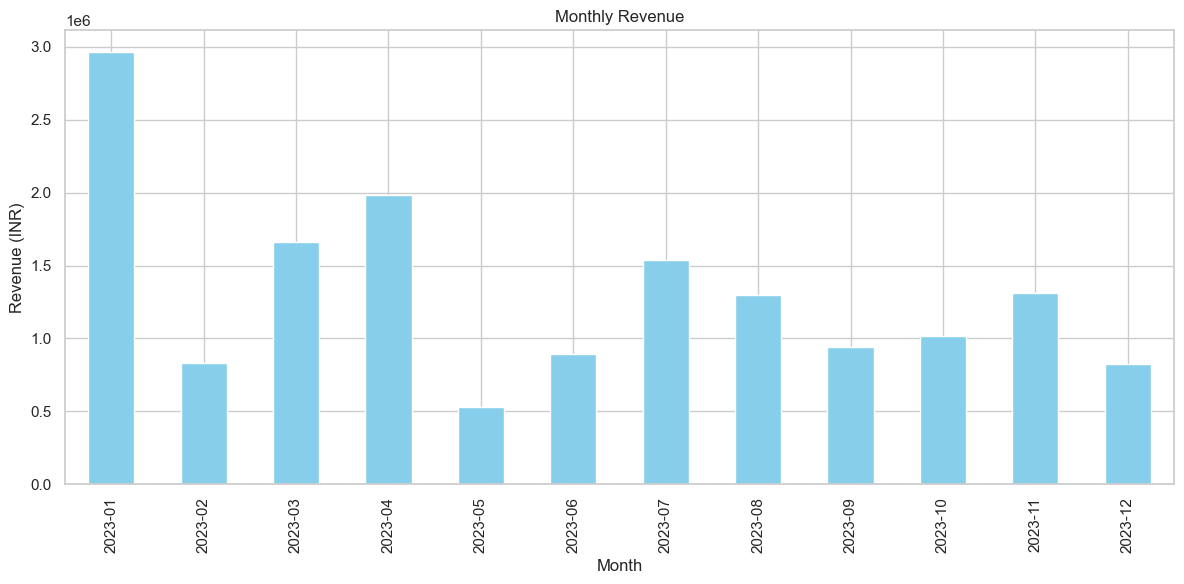

In [6]:
# 6. Plot Monthly Revenue
monthly_revenue.plot(kind='bar', figsize=(12, 6), color='skyblue', title='Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue (INR)')
plt.tight_layout()
plt.show()

In [8]:
# 7. Product-wise Revenue Analysis
product_revenue = df.groupby('Product')['Revenue'].sum().sort_values(ascending=False)
print("Revenue by Product:")
print(product_revenue)

Revenue by Product:
Product
Laptop        10700000
Tablet         3220000
Monitor        1440000
Headphones      222000
Keyboard        159600
Mouse            75200
Name: Revenue, dtype: int64


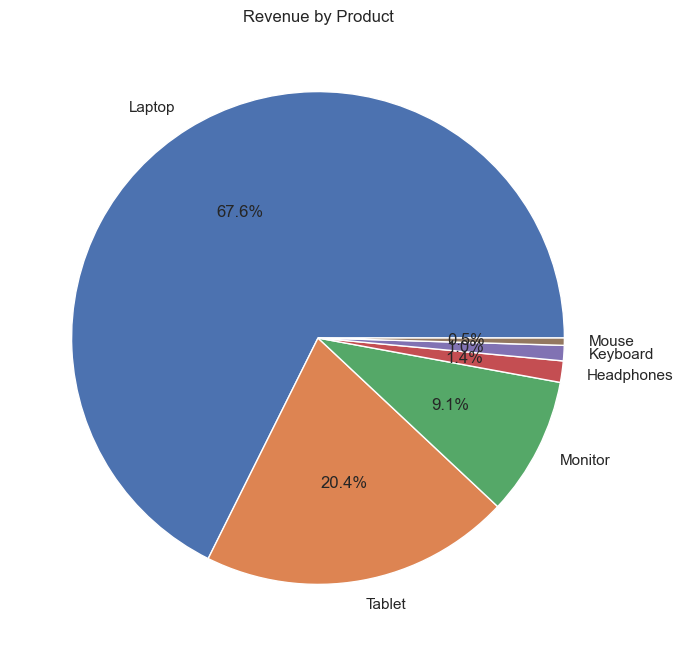

In [9]:
# 8. Plot Revenue by Product
product_revenue.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), title='Revenue by Product')
plt.ylabel('')
plt.show()

In [10]:
# 9. Region-wise Revenue Analysis
region_revenue = df.groupby('Region')['Revenue'].sum().sort_values()
print("Revenue by Region:")
print(region_revenue)

Revenue by Region:
Region
North    3078600
East     3343300
West     3960100
South    5434800
Name: Revenue, dtype: int64


In [11]:
# 11. Top 5 Products by Revenue
top_products = df.groupby('Product')['Revenue'].sum().sort_values(ascending=False).head(5)
print("Top 5 Products by Revenue:")
print(top_products)

Top 5 Products by Revenue:
Product
Laptop        10700000
Tablet         3220000
Monitor        1440000
Headphones      222000
Keyboard        159600
Name: Revenue, dtype: int64


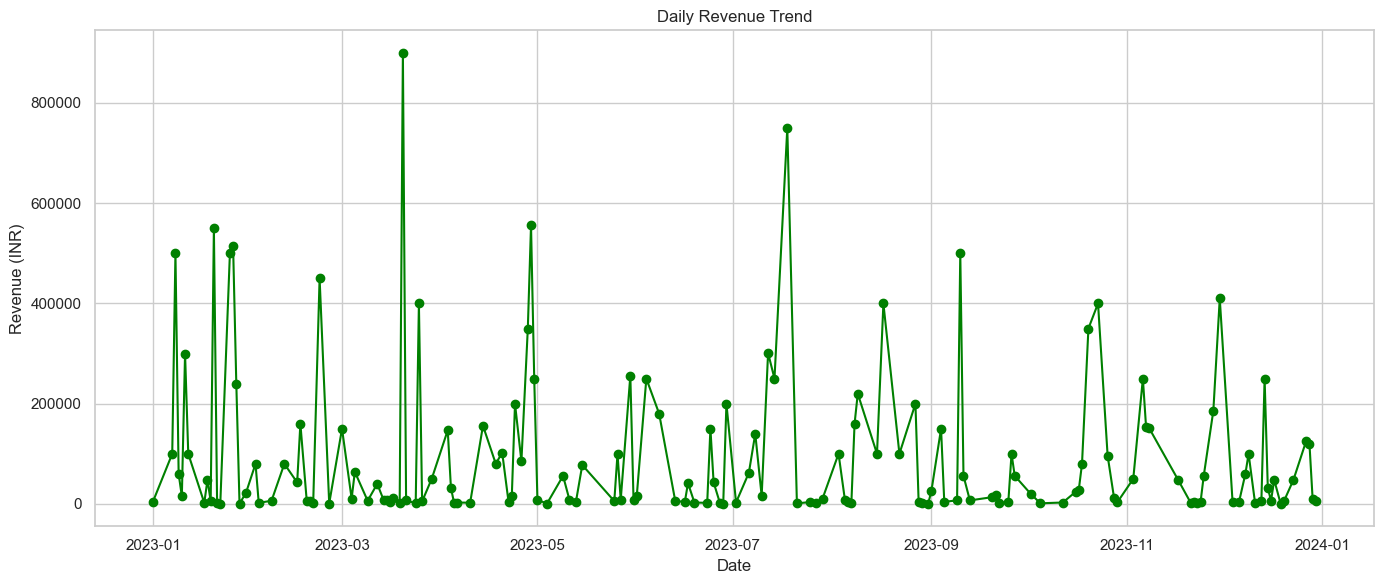

In [12]:
# 12. Sales Trend Over Time
daily_revenue = df.groupby('Date')['Revenue'].sum()

plt.figure(figsize=(14, 6))
plt.plot(daily_revenue.index, daily_revenue.values, marker='o', linestyle='-', color='green')
plt.title('Daily Revenue Trend')
plt.xlabel('Date')
plt.ylabel('Revenue (INR)')
plt.grid(True)
plt.tight_layout()
plt.show()

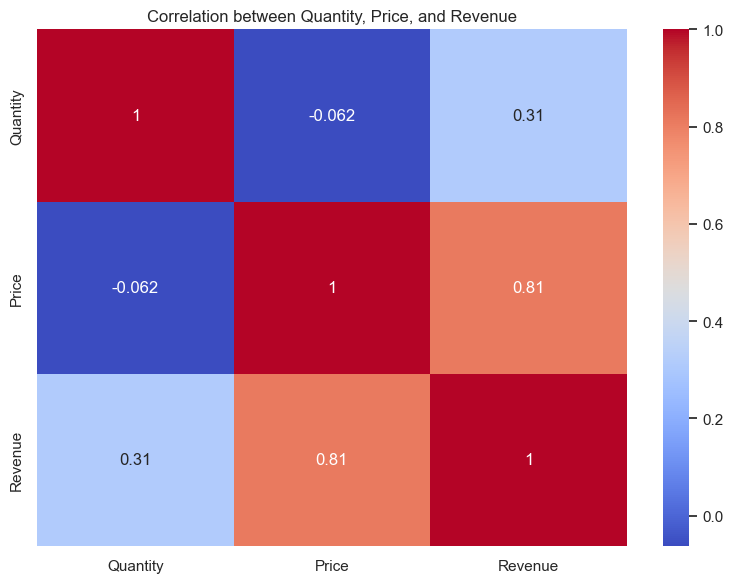

In [13]:
# 13. Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Quantity', 'Price', 'Revenue']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Quantity, Price, and Revenue')
plt.tight_layout()
plt.show()

**Top Region per Product**

In [14]:
top_region_per_product = df.groupby(['Product', 'Region'])['Revenue'].sum().reset_index()
top_region = top_region_per_product.loc[top_region_per_product.groupby('Product')['Revenue'].idxmax()]
print(top_region)

       Product Region  Revenue
3   Headphones   West    63000
5     Keyboard  North    77000
10      Laptop  South  3950000
12     Monitor   East   568000
17       Mouse  North    25600
23      Tablet   West  1100000


**Monthly Trend per Product**

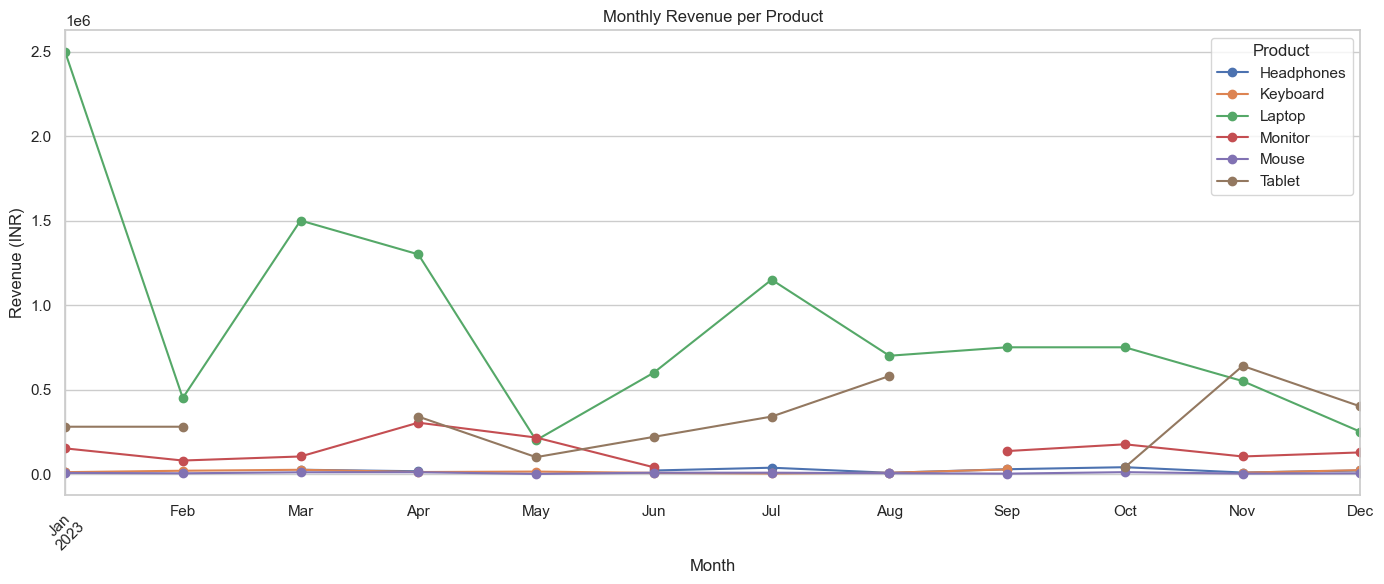

In [16]:
monthly_product_revenue = df.groupby(['Month', 'Product'])['Revenue'].sum().unstack()

monthly_product_revenue.plot(figsize=(14, 6), marker='o', title='Monthly Revenue per Product')
plt.ylabel('Revenue (INR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Export Summary to Excel with Multiple Sheets**

In [3]:
# 1. Import pandas and load CSV
import pandas as pd
df = pd.read_csv("sales_data.csv")

# 2. Preprocess data
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M')
df['Revenue'] = df['Quantity'] * df['Price']

# 3. Create summaries
monthly_revenue = df.groupby('Month')['Revenue'].sum()
product_revenue = df.groupby('Product')['Revenue'].sum()
region_revenue = df.groupby('Region')['Revenue'].sum()

In [4]:
with pd.ExcelWriter("sales_summary.xlsx", engine='openpyxl') as writer:
    df.to_excel(writer, sheet_name='Raw Data', index=False)
    monthly_revenue.to_frame(name='Monthly Revenue').to_excel(writer, sheet_name='Monthly Revenue')
    product_revenue.to_frame(name='Product Revenue').to_excel(writer, sheet_name='Product Revenue')
    region_revenue.to_frame(name='Region Revenue').to_excel(writer, sheet_name='Region Revenue')